In [41]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

X,y = mnist.data,mnist.target

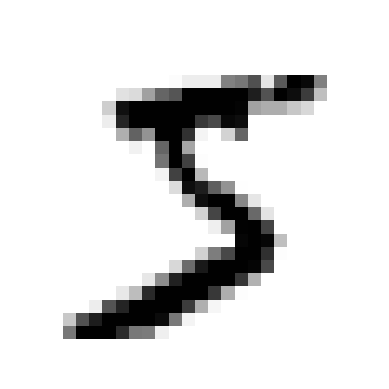

'5'

In [42]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
some_digit = X[0]
plot_digit(some_digit)
plt.show()
y[0]

In [43]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

# training a binary classifier for identifying 5
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
prediction = sgd_clf.predict([some_digit])

score = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(score)

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))
score_dummy = cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring = "accuracy")
print(score_dummy)

[0.95035 0.96035 0.9604 ]
False
[0.90965 0.90965 0.90965]


In [44]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
cm = confusion_matrix(y_train_5, y_train_pred)
print(cm)
ps = precision_score(y_train_5, y_train_pred)
rs = recall_score(y_train_5, y_train_pred)
print("Precision: " , ps)
print("Recall: " , rs)

[[53892   687]
 [ 1891  3530]]
Precision:  0.8370879772350012
Recall:  0.6511713705958311


In [45]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)


[2164.22030239]
[False]


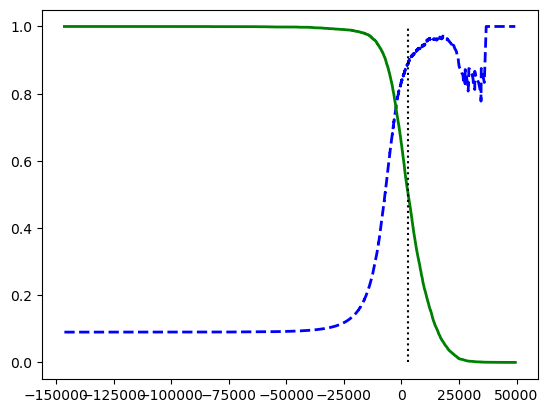

In [46]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2) 
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2) 
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.show()

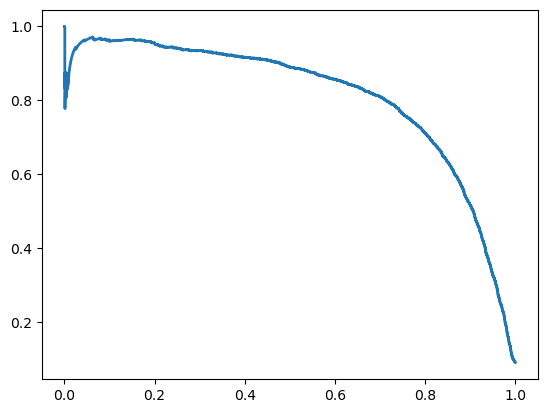

In [47]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.show()